<a href="https://colab.research.google.com/github/AlbertFarkhutdinov/ml_lessons/blob/main/dence_ae_by_habr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

import matplotlib.pyplot as plt

import numpy as np

plt.style.use('seaborn')

In [2]:
def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2 * n, 2 * len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i * n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [4]:
SHAPE = (28, 28, 1)
SHAPE

(28, 28, 1)

In [5]:
def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    input_img = Input(shape=SHAPE)
    encoded = Dense(encoding_dim, activation='relu')(Flatten()(input_img))
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    decoded = Reshape(SHAPE)(
        Dense(SHAPE[0] * SHAPE[1], activation='sigmoid')(input_encoded)
    )
    
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [6]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 49)                38465     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.fit(
    x_train, 
    x_train,
    batch_size=256,
    epochs=50,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2573 - val_loss: 0.1736
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1537 - val_loss: 0.1357
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1268 - val_loss: 0.1169
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1118 - val_loss: 0.1049
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1018 - val_loss: 0.0969
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0951 - val_loss: 0.0912
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0903 - val_loss: 0.0875
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0870 - val_loss: 0.0847
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0846 - val_loss: 0.0827
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0831 - val_lo

In [9]:
n = 10

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)

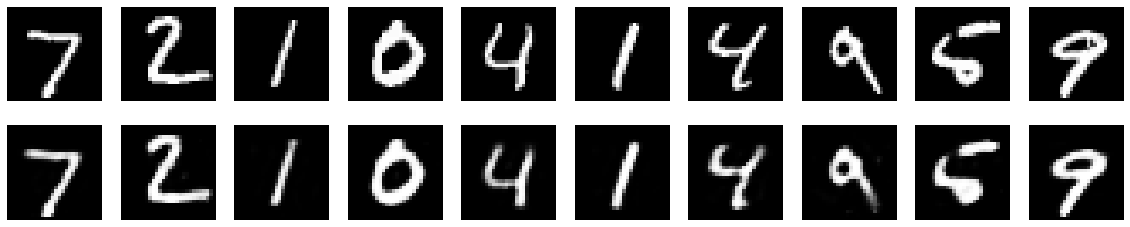

In [10]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)